In [45]:
import numpy as np
import pandas as pd 

In [46]:
df= pd.read_csv('../Dataset_Folder/moviereviews.csv')

In [47]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [48]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [49]:
df= df.dropna()

In [50]:
df.isnull().sum()

label     0
review    0
dtype: int64

Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or " " or some other larger blank string.

In [51]:
df['review'].str.isspace().sum()

27

In [52]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [53]:
df = df[~df['review'].str.isspace()]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [55]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

# EDA on Bag of Words

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
cv = CountVectorizer(stop_words='english')

In [58]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [59]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


# Training and Data

In [60]:
from sklearn.model_selection import train_test_split

X = df['review'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Vectorization

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(stop_words='english')

In [63]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [64]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [65]:
X_train_tfidf

<1550x35075 sparse matrix of type '<class 'numpy.float64'>'
	with 374673 stored elements in Compressed Sparse Row format>

# Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [67]:
#Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [69]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

# Performance Evaluation

In [70]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [71]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



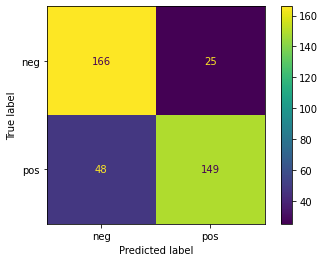

In [72]:
report(nb)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



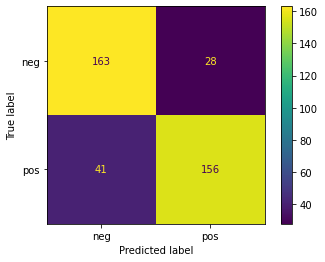

In [73]:
report(log)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



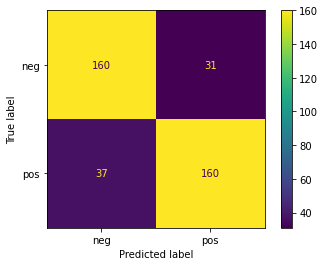

In [74]:
report(svc)

# Finalizing a PipeLine for Deployment

In [75]:
from sklearn.pipeline import Pipeline

In [76]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [77]:
pipe.fit(df['review'],df['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [78]:
new_review=['''robert benton has assembled a stellar , mature cast for his latest feature , twilight , a film noir mystery set amid the fading stars of hollywood . 
paul newman stars as retired detective harry ross . 
harry has spent the last couple of years doing odd jobs for jack and catherine ames ( gene hackman and susan sarandon ) , a pair of married actors who have fallen from the limelight . 
when jack sends him on a routine delivery job , however , the old instincts kick in . 
soon , harry is wading through a mystery where friendships and lives are on the line , and he no longer knows who to trust . 
there are plenty of familiar faces throughout twilight , in addition to newman , hackman and sarandon . 
james garner plays raymond hope , a former cop and one of harry's best friends . 
stockard channing plays verna , harry's former partner , and possibly a former love interest . 
reese witherspoon is mel , the distrustful daughter of the ames' , and liev schrieber is her scuzzy boyfriend . 
giancarlo esposito appears as harry's bumbling detective protigi , and john spencer is a suspicious police captain . 
with a cast like that , it's almost worth watching twilight just to stargaze . 
luckily , there's more to the film than some sort of actor's recognition ceremony . 
twilight has a solid film noir-ish plot . 
it may not have as many twists and turns as some of the classics , but it has much more than a lot of what passes for film these days . 
the major cast members all deliver strong performances , as can be expected of their caliber . 
however , none of them have that little extra oomph which would make them memorable . 
the supporting cast is enjoyable , if a little underdrawn . 
stockard channing's character , in particular , is a cipher . 
there's more to her character than the film takes the time to describe . 
it's a minor , but irritating , flaw . 
with a solid cast , and a good plot , there's a lot to recommend about twilight . 
it's biggest flaw is actually its short running time . 
at a slim 94 minutes , there's a lot of stuff that's packed into an awfully small package . 
still , the chance to see newman , sarandon and hackman working together is worth a cramp or two .''' 
]

In [79]:
pipe.predict(new_review)

array(['pos'], dtype=object)